Nosso processo de análise será focado no formulário de cadastro, com o objetivo de extrair informações valiosas para aprimorar nossos serviços:

1. Identificação de Gênero e Perfil de Usuários: Vamos identificar o gênero mais comum entre os cadastros e prever o perfil daqueles envolvidos na administração do negócio e dos processos. 
* Será utilizado a classificação

2. Análise de Regiões de Atendimento: Analisaremos as regiões de atendimento para determinar onde concentrar nossos esforços e melhorar a experiência do usuário nessas áreas.
* Será utilizado a Regressão neste processo

3. Domínios de E-mail e Preferências de Login: Será feita uma análise dos domínios de e-mail mais comuns entre os cadastros, além de identificar aqueles que preferem fazer login de forma direta, sem a necessidade de se cadastrar novamente. Essas informações nos ajudarão a implementar novos serviços no site, como a integração com a API do Google, que permite aos usuários fazer o login em apenas dois cliques, proporcionando uma experiência mais rápida e eficiente.
* Iremos utilizar a Classificação: Para identificar os domínios de e-mail mais comuns e analisar as preferências de login,  também podemos usar esses mesmos algoritmos para prever se um usuário preferirá fazer login de forma direta.

Estamos constantemente buscando formas de melhorar nossos processos, e a análise dessas informações será fundamental para esse propósito.

Passo 1: Carregar os Dados
Vamos utilizar os dados em xlsx.Nosso formulário possui os campos
1. Nome
2. Sobrenome
3. Email
4. Telefone
5. Senha
6. ConfirmacaoSenha
7. Genero
8. Empresa
9. DDD

In [1]:

## Carregar os dados e tratar as informações que irei utilizar.
import pandas as pd

base_cadastro = pd.read_excel('base_cadastro.xlsx')

# Criar um DataFrame com os dados
df = pd.DataFrame(base_cadastro)

# Exibir o DataFrame
df.head()



,Nome,Sobrenome,Email,Telefone,Senha,ConfirmacaoSenha,Genero,Empresa,DDD
0,Alice,Silva,alice@gmail.com,11987654321,123456,123456,Feminino,Empresa1,11
1,Bob,Souza,bob@gmail.com,11958856655,abcdef,abcdef,Masculino,Empresa2,11
2,Carlos,Oliveira,carlos@gmail.com,11991234567,789654,789654,Feminino,Empresa3,11
3,Daniel,Santos,daniel@github.com.br,11987654321,123abc,password,Prefiro não dizer,Empresa4,11
4,Eduarda,Cavalcanti,eduarda@gmail.com,11958856655,123abc,123abc,Feminino,Empresa5,11


In [2]:
# Exibir informações da tabela
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Nome              116 non-null    object
 1   Sobrenome         116 non-null    object
 2   Email             116 non-null    object
 3   Telefone          116 non-null    int64 
 4   Senha             116 non-null    object
 5   ConfirmacaoSenha  116 non-null    object
 6   Genero            116 non-null    object
 7   Empresa           116 non-null    object
 8   DDD               116 non-null    int64 
dtypes: int64(2), object(7)
memory usage: 8.3+ KB


In [3]:
## Verificar os valores na coluna genero

df['Genero'].unique()

array(['Feminino', 'Masculino', 'Prefiro não dizer'], dtype=object)

Passo 2: Pré-processamento dos Dados
Vou apagar o que não precisar e tratar o restante dos dados

In [4]:
# Mapear os valores 'Feminino', 'Masculino' e 'Prefiro não dizer' para valores numéricos
df['Genero_Num'] = df['Genero'].map({'Feminino': 0, 'Masculino': 1, 'Prefiro não dizer': 2})



In [5]:
df.head()

,Nome,Sobrenome,Email,Telefone,Senha,ConfirmacaoSenha,Genero,Empresa,DDD,Genero_Num
0,Alice,Silva,alice@gmail.com,11987654321,123456,123456,Feminino,Empresa1,11,0
1,Bob,Souza,bob@gmail.com,11958856655,abcdef,abcdef,Masculino,Empresa2,11,1
2,Carlos,Oliveira,carlos@gmail.com,11991234567,789654,789654,Feminino,Empresa3,11,0
3,Daniel,Santos,daniel@github.com.br,11987654321,123abc,password,Prefiro não dizer,Empresa4,11,2
4,Eduarda,Cavalcanti,eduarda@gmail.com,11958856655,123abc,123abc,Feminino,Empresa5,11,0


In [6]:
## Apagar as colunas que não iremos utilizar na análise

df = df.drop(['Nome', 'Sobrenome', 'Email', 'Telefone', 'Senha', 'ConfirmacaoSenha', 'Empresa', 'DDD'], axis=1)


In [7]:
df.head()

,Genero,Genero_Num
0,Feminino,0
1,Masculino,1
2,Feminino,0
3,Prefiro não dizer,2
4,Feminino,0


In [8]:
from sklearn.preprocessing import LabelEncoder

# Transformar a coluna Genero em valores numéricos
le = LabelEncoder()
df['Genero_Num'] = le.fit_transform(df['Genero'])

In [9]:
df['Genero_Num']

0      0
1      1
2      0
3      2
4      0
      ..
111    0
112    1
113    0
114    1
115    0
Name: Genero_Num, Length: 116, dtype: int32

In [10]:
# Selecionar as colunas para treino
X = df[['Genero_Num']]

# Selecionar a coluna Genero como objetivo
y = df['Genero']


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Genero      116 non-null    object
 1   Genero_Num  116 non-null    int32 
dtypes: int32(1), object(1)
memory usage: 1.5+ KB


In [12]:
from sklearn.model_selection import train_test_split

# Dividir os dados em conjuntos de treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
# Exibir o número de amostras em cada conjunto
print("Número treino:", len(X_train))
print("Número teste:", len(X_test))

Número treino: 92
Número teste: 24


Passo 3: Treinar o Modelo

Neste passo, vamos utilizar um modelo de classificação para prever o gênero com base nas demais informações do formulário. Vamos usar o algoritmo Random Forest, que é eficaz em lidar com dados categóricos e pode ser usado para classificação.

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Inicializar o modelo
modelo = RandomForestClassifier(random_state=42)


In [16]:
modelo

RandomForestClassifier(random_state=42)

In [17]:
print("Dados de Treino:")
print(X_train.head())
print(y_train.head())

print("\nValores ausentes nos dados de treino:")
print(X_train.isnull().sum())
print(y_train.isnull().sum())


Dados de Treino:
    Genero_Num
15           1
68           0
31           1
24           0
55           1
15    Masculino
68     Feminino
31    Masculino
24     Feminino
55    Masculino
Name: Genero, dtype: object

Valores ausentes nos dados de treino:
Genero_Num    0
dtype: int64
0


In [18]:
# Treinar o modelo nos dados de treino
modelo.fit(X_train, y_train)

# Fazer previsões nos dados de teste
y_pred = modelo.predict(X_test)

# Calcular a acurácia do modelo
acuracia = accuracy_score(y_test, y_pred)
print("Acurácia do modelo:", acuracia)

Acurácia do modelo: 1.0


In [24]:
y_pred

array(['Masculino', 'Feminino', 'Feminino', 'Feminino', 'Feminino',
       'Masculino', 'Masculino', 'Feminino', 'Feminino', 'Masculino',
       'Masculino', 'Feminino', 'Masculino', 'Masculino', 'Feminino',
       'Feminino', 'Feminino', 'Masculino', 'Feminino', 'Masculino',
       'Feminino', 'Masculino', 'Feminino', 'Feminino'], dtype=object)

In [25]:
y_test

83     Masculino
4       Feminino
42      Feminino
40      Feminino
10      Feminino
47     Masculino
110    Masculino
36      Feminino
70      Feminino
11     Masculino
45     Masculino
26      Feminino
94     Masculino
53     Masculino
18      Feminino
0       Feminino
56      Feminino
85     Masculino
109     Feminino
100    Masculino
93      Feminino
88     Masculino
67      Feminino
12      Feminino
Name: Genero, dtype: object

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, classification_report

In [27]:
matriz_confusao = confusion_matrix(y_true = y_test,
                                   y_pred = y_pred,
                                   labels=['Masculino','Feminino'])

<Figure size 1500x500 with 0 Axes>

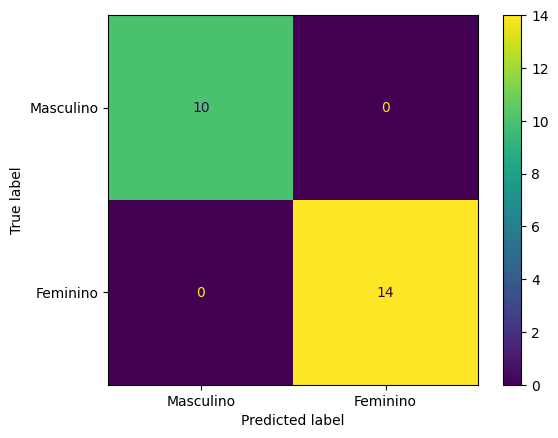

In [30]:
# Para trabalhar com gráficos
import matplotlib.pyplot as plt  
import seaborn as sns

# plotando uma figura com a matriz de confusao
figure = plt.figure(figsize=(15, 5))
disp = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao, display_labels=['Masculino','Feminino'])
disp.plot(values_format='d') 

In [31]:
accuracy_score(y_true = y_test, y_pred = y_pred,) 

1.0

In [33]:
precision_score(y_true = y_test, 
         y_pred = y_pred,
         pos_label="Feminino") 

1.0

In [34]:
recall_score(y_true = y_test, 
         y_pred = y_pred,
         pos_label="Feminino") 

1.0

In [35]:
f1_score(y_true = y_test, 
         y_pred = y_pred,
         pos_label="Feminino") 

1.0

In [36]:
# Metricas de precisão, revocação, f1-score e acurácia.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Feminino       1.00      1.00      1.00        14
   Masculino       1.00      1.00      1.00        10

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24



Com base na análise dos gêneros, obtive os seguintes resultados:

1. Precision (Precisão): 100% para ambos os gêneros, o que indica que todas as previsões de gênero foram corretas.

2. Recall (Revocação): 100% para ambos os gêneros, indicando que o modelo identificou todos os casos de cada gênero corretamente.

3. F1-Score: 100% para ambos os gêneros, uma média harmônica entre precisão e recall.
Acurácia: 100%, o que significa que o modelo acertou todas as previsões em relação ao gênero.

Esses resultados sugerem que o modelo foi capaz de prever com precisão e confiabilidade o gênero dos dados analisados, o que pode ser útil para suas análises administrativas.